# Step 0: Import Libraries

In [1]:
#Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Keras DL package
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
print('Tensorflow version: '+ tf.__version__)

#Sci-kit Learn package
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error #Errors
from sklearn.preprocessing import MinMaxScaler #Scaling
from math import sqrt
from sklearn.model_selection import train_test_split #To split data

Tensorflow version: 2.4.0


# Step 1: Import Data

In [2]:
df = pd.read_csv('kc_house_data.csv', encoding = 'ISO-8859-1')

In [3]:
df.keys()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
len(df.keys())

21

In [5]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [6]:
df.tail(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Step 2: Visualize Data

In [9]:
df.isnull().values.any()

False

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cen

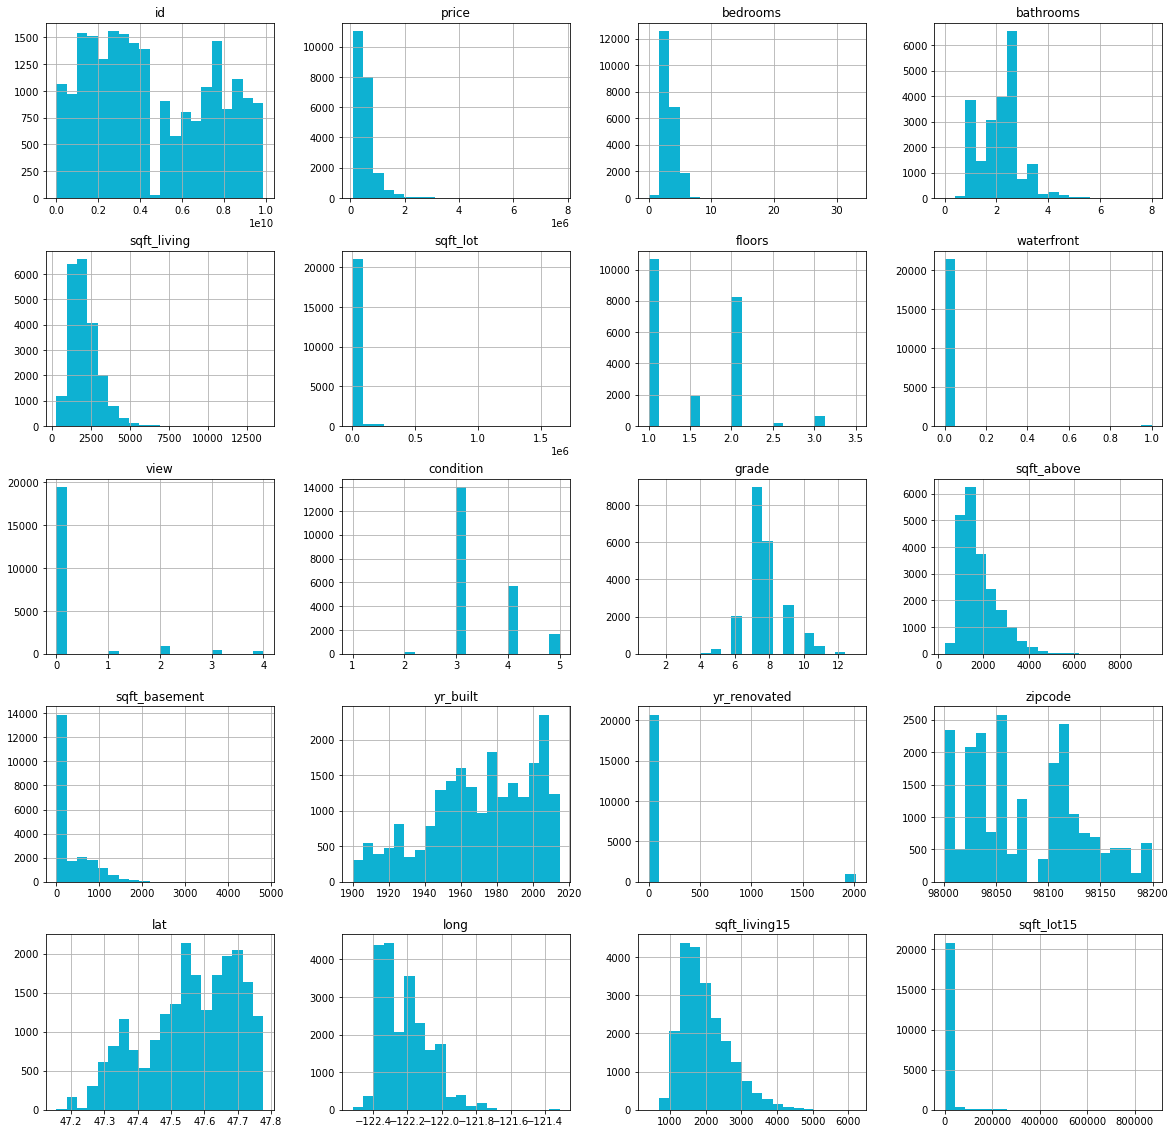

In [10]:
df.hist(bins = 20, figsize = (20,20), color = '#0EB1D2')

<AxesSubplot:>

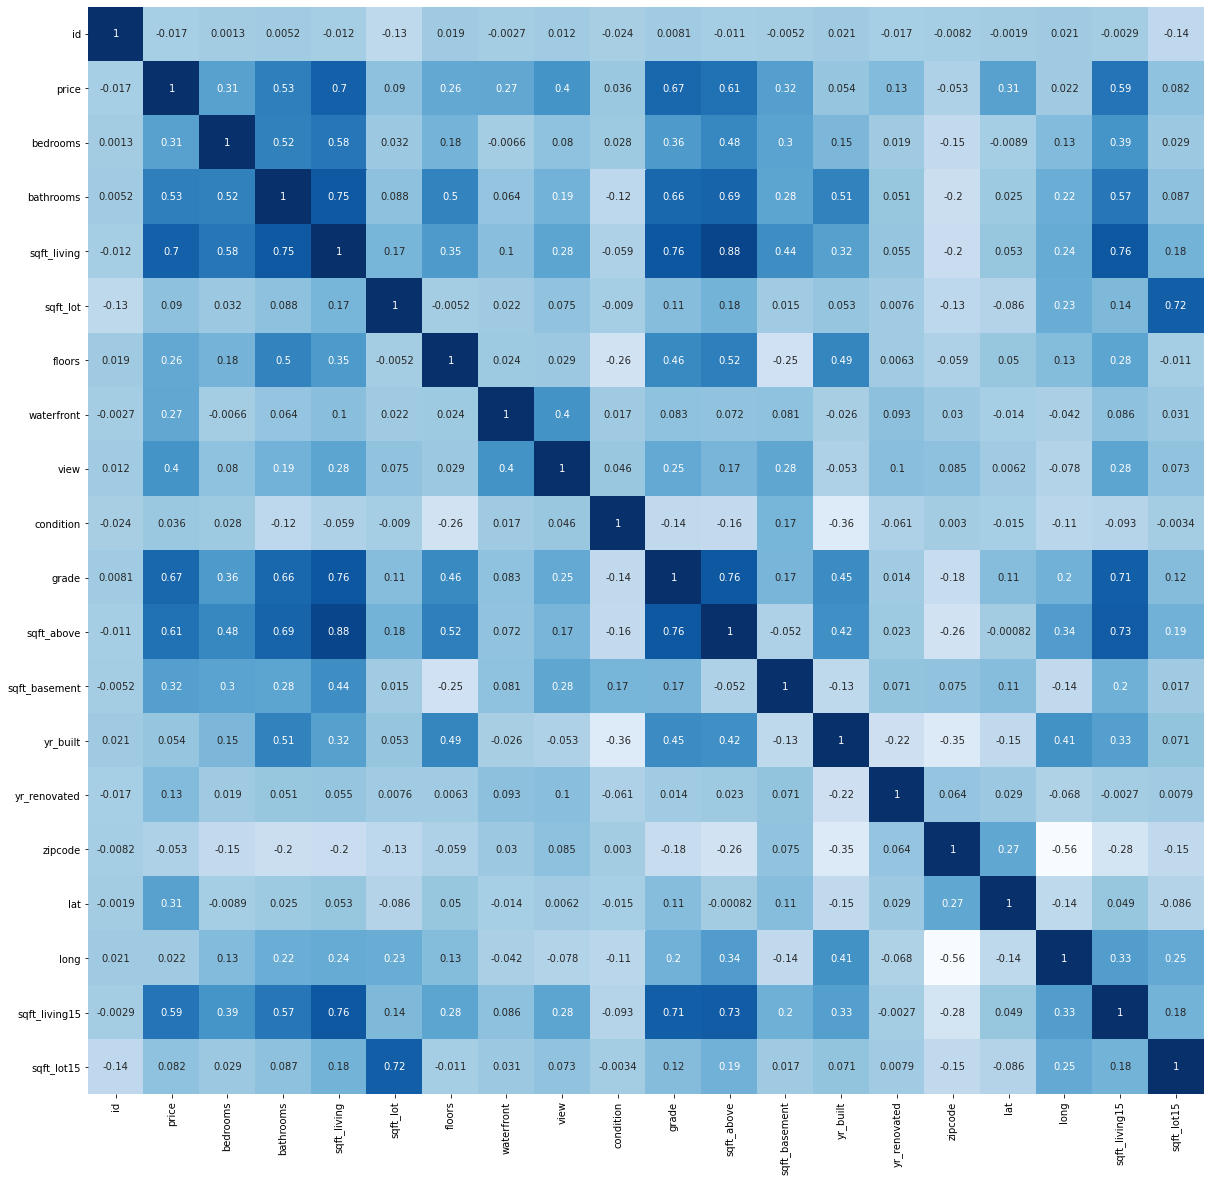

In [11]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True, cbar=False, cmap='Blues')

In [12]:
df_sample = df[['price', 'sqft_living', 'sqft_lot','floors', 'yr_built']]

In [13]:
df_sample.head(3)

,price,sqft_living,sqft_lot,floors,yr_built
0,221900.0,1180,5650,1.0,1955
1,538000.0,2570,7242,2.0,1951
2,180000.0,770,10000,1.0,1933


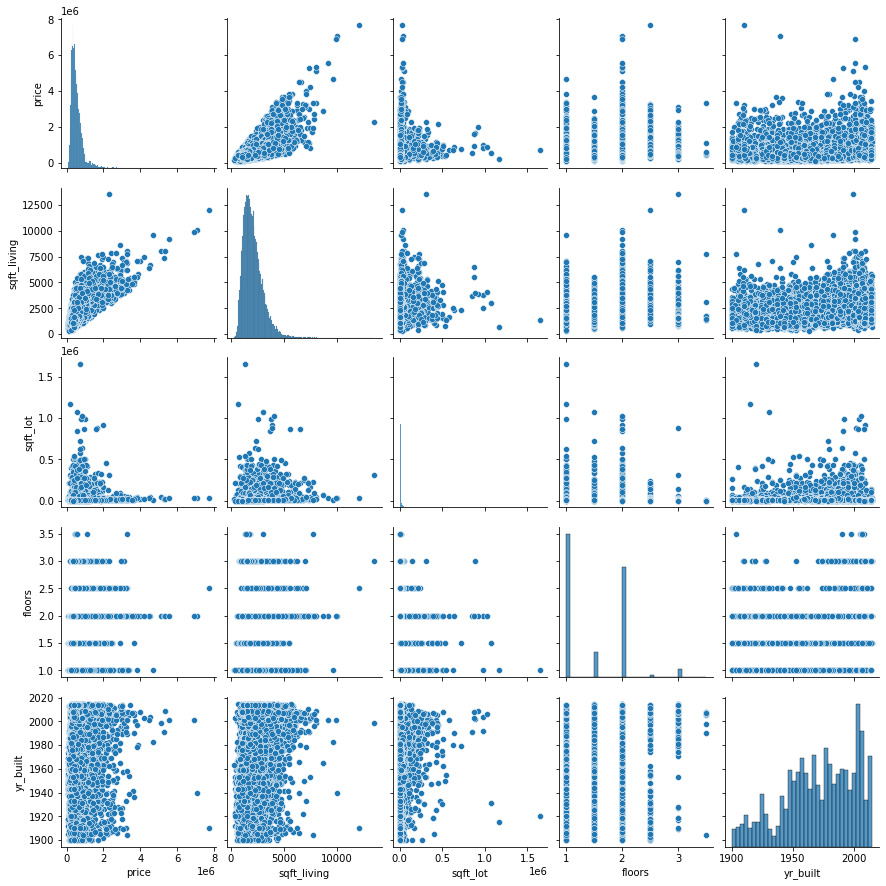

In [14]:
sns.pairplot(df_sample)

# Step 3: Create Training and Testing Data

In [15]:
X = df.drop(['id','date','price'],axis=1)

In [16]:
X.shape

(21613, 18)

In [17]:
y = df['price']

In [18]:
X.shape

(21613, 18)

In [19]:
y.shape

(21613,)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.21760797, 0.16193426,
        0.00574235],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.16611296, 0.22216486,
        0.00802712],
       [0.06060606, 0.125     , 0.03622642, ..., 0.23754153, 0.3994149 ,
        0.00851302],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.18272425, 0.10686629,
        0.00155764],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.37375415, 0.17398038,
        0.00073057],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.18272425, 0.10686629,
        0.00081098]])

In [22]:
scaler.data_max_

array([ 3.300000e+01,  8.000000e+00,  1.354000e+04,  1.651359e+06,
        3.500000e+00,  1.000000e+00,  4.000000e+00,  5.000000e+00,
        1.300000e+01,  9.410000e+03,  4.820000e+03,  2.015000e+03,
        2.015000e+03,  9.819900e+04,  4.777760e+01, -1.213150e+02,
        6.210000e+03,  8.712000e+05])

In [23]:
scaler.data_min_

array([ 0.00000e+00,  0.00000e+00,  2.90000e+02,  5.20000e+02,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  1.00000e+00,
        1.00000e+00,  2.90000e+02,  0.00000e+00,  1.90000e+03,
        0.00000e+00,  9.80010e+04,  4.71559e+01, -1.22519e+02,
        3.99000e+02,  6.51000e+02])

In [24]:
y = y.values.reshape(-1,1)

In [25]:
y.shape

(21613, 1)

In [26]:
y_scaled = scaler.fit_transform(y)

In [27]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2)

In [29]:
X_train.shape

(17290, 18)

In [30]:
X_test.shape

(4323, 18)

# Step 4: Train Model

In [31]:
model = keras.Sequential(
    [
        layers.Dense(100, activation="relu", name="layer1", input_shape=(X.shape[1],)),
        layers.Dense(100, activation="relu", name="layer2"),
        layers.Dense(100, activation="relu", name="layer3"),
        layers.Dense(1, activation="linear", name="layer4")
    ]
)

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 100)               1900      
_________________________________________________________________
layer2 (Dense)               (None, 100)               10100     
_________________________________________________________________
layer3 (Dense)               (None, 100)               10100     
_________________________________________________________________
layer4 (Dense)               (None, 1)                 101       
Total params: 22,201
Trainable params: 22,201
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [34]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
277/277 [==============================] - 1s 3ms/step - loss: 0.0023 - val_loss: 5.9252e-04
Epoch 2/100
277/277 [==============================] - 0s 891us/step - loss: 5.5297e-04 - val_loss: 5.3304e-04
Epoch 3/100
277/277 [==============================] - 0s 897us/step - loss: 4.8118e-04 - val_loss: 4.2539e-04
Epoch 4/100
277/277 [==============================] - 0s 897us/step - loss: 4.0756e-04 - val_loss: 3.7961e-04
Epoch 5/100
277/277 [==============================] - 0s 878us/step - loss: 4.1613e-04 - val_loss: 3.6966e-04
Epoch 6/100
277/277 [==============================] - 0s 853us/step - loss: 3.9430e-04 - val_loss: 3.7013e-04
Epoch 7/100
277/277 [==============================] - 0s 863us/step - loss: 3.8578e-04 - val_loss: 4.1340e-04
Epoch 8/100
277/277 [==============================] - 0s 863us/step - loss: 3.7084e-04 - val_loss: 3.5846e-04
Epoch 9/100
277/277 [==============================] - 0s 852us/step - loss: 3.4857e-04 - val_loss: 3.4611e-04
Epoch 1

277/277 [==============================] - 0s 941us/step - loss: 1.7507e-04 - val_loss: 2.5403e-04
Epoch 75/100
277/277 [==============================] - 0s 875us/step - loss: 1.7264e-04 - val_loss: 2.3902e-04
Epoch 76/100
277/277 [==============================] - 0s 872us/step - loss: 1.4344e-04 - val_loss: 2.9990e-04
Epoch 77/100
277/277 [==============================] - 0s 888us/step - loss: 1.5686e-04 - val_loss: 2.3994e-04
Epoch 78/100
277/277 [==============================] - 0s 872us/step - loss: 1.7553e-04 - val_loss: 3.0028e-04
Epoch 79/100
277/277 [==============================] - 0s 870us/step - loss: 1.6565e-04 - val_loss: 2.7820e-04
Epoch 80/100
277/277 [==============================] - 0s 865us/step - loss: 1.5687e-04 - val_loss: 2.3762e-04
Epoch 81/100
277/277 [==============================] - 0s 869us/step - loss: 1.4485e-04 - val_loss: 2.3998e-04
Epoch 82/100
277/277 [==============================] - 0s 986us/step - loss: 1.5408e-04 - val_loss: 2.4310e-04
Epoch

# Step 5: Evaluate Model

In [35]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

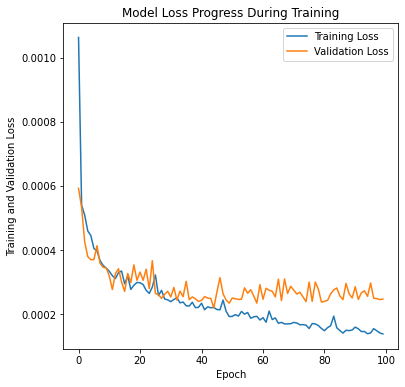

In [36]:
plt.figure(figsize=(6,6))
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

Text(0.5, 0, 'Ground Truth')

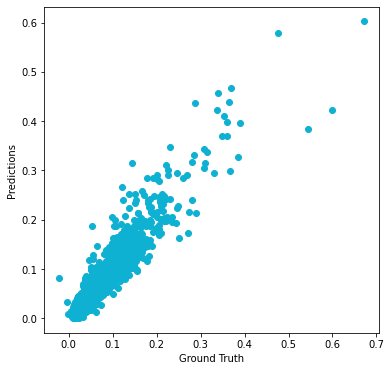

In [37]:
plt.figure(figsize=(6,6))
y_predict = model.predict(X_test)
plt.plot(y_predict, y_test, 'o', color = '#0EB1D2')
plt.ylabel('Predictions')
plt.xlabel('Ground Truth')

In [38]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

(0.0, 3000000.0)

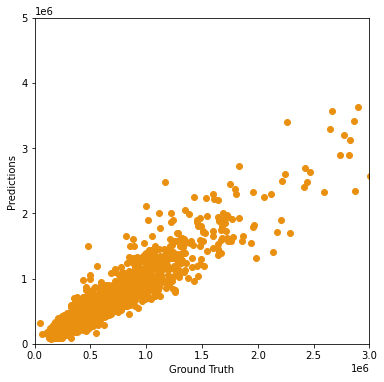

In [39]:
plt.figure(figsize=(6,6))
plt.plot(y_predict_orig, y_test_orig, "o", color = '#EA9010')
plt.ylabel('Predictions')
plt.xlabel('Ground Truth')
plt.ylim(0, 5000000)
plt.xlim(0, 3000000)

In [40]:
n = X_test.shape[0]
k = X_test.shape[1]

In [41]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 124565.818 
MSE = 15516642898.239933 
MAE = 74256.3022188729 
R2 = 0.8825954755506423 
Adjusted R2 = 0.8821044714985772
